# LOGISTIC REGRESSION
1. Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA).
b. Examine the features, their types, and summary statistics.
c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.
2. Data Preprocessing:
a. Handle missing values (e.g., imputation).
b. Encode categorical variables.
3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
b. Train the model using the training data.
4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.
5. Interpretation:
a. Interpret the coefficients of the logistic regression model.
b. Discuss the significance of features in predicting the target variable (survival probability in this case).
6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 

(optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories. 
Detailed deployment instructions are available in the Streamlit Documentation.
https://docs.streamlit.io/streamlit-community-cloud/deploy-your-app 
Interview Questions:
1. What is the difference between precision and recall?
2. What is cross-validation, and why is it important in binary classification?




In [250]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### a. Load the dataset and perform exploratory data analysis (EDA).

In [251]:
df = pd.read_csv('Titanic_train.csv')

In [252]:
df


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

## Data Exploration

In [253]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [254]:
df.shape

(891, 12)

In [255]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### b. Examine the features, their types, and summary statistics.

In [256]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [257]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [258]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [259]:
df['Age'].fillna(df['Age'].mean(), inplace = True )

C:\Users\Asad\AppData\Local\Temp\ipykernel_36196\2907897569.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True )


In [260]:
df['Cabin'].fillna(df['Cabin'].mode, inplace=True)


In [261]:
df['Embarked'].fillna(df['Embarked'].mode, inplace= True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [262]:
df.duplicated().sum()

0

### c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and 

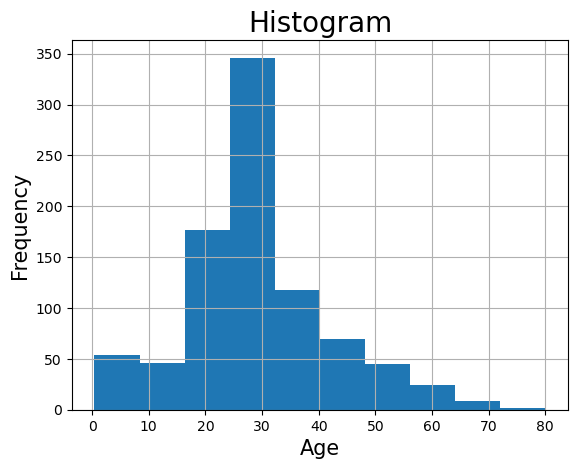

In [263]:
df.hist(column = 'Age' )
plt.title('Histogram' , size = 20)
plt.xlabel('Age', size =15)
plt.ylabel('Frequency', size =15 )
plt.show()

In [264]:
df['Age'].dtypes

dtype('float64')

<function matplotlib.pyplot.show(close=None, block=None)>

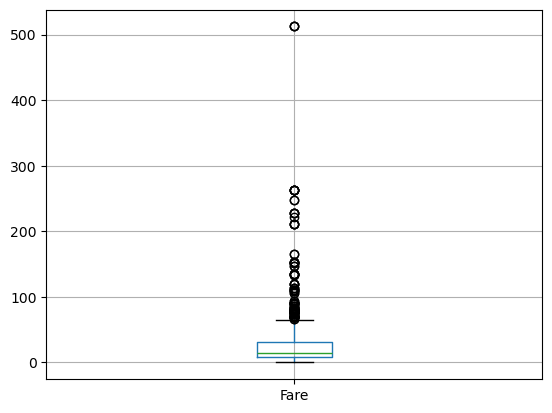

In [265]:
df.boxplot(column = ['Fare'])
plt.show

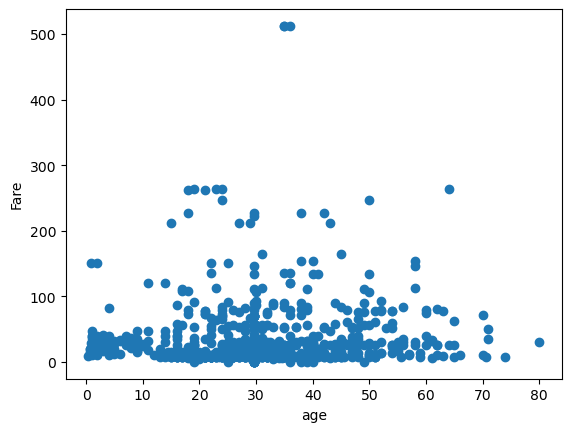

In [266]:
plt.scatter(df['Age'], df['Fare'])

plt.xlabel('age')
plt.ylabel('Fare')
plt.show()

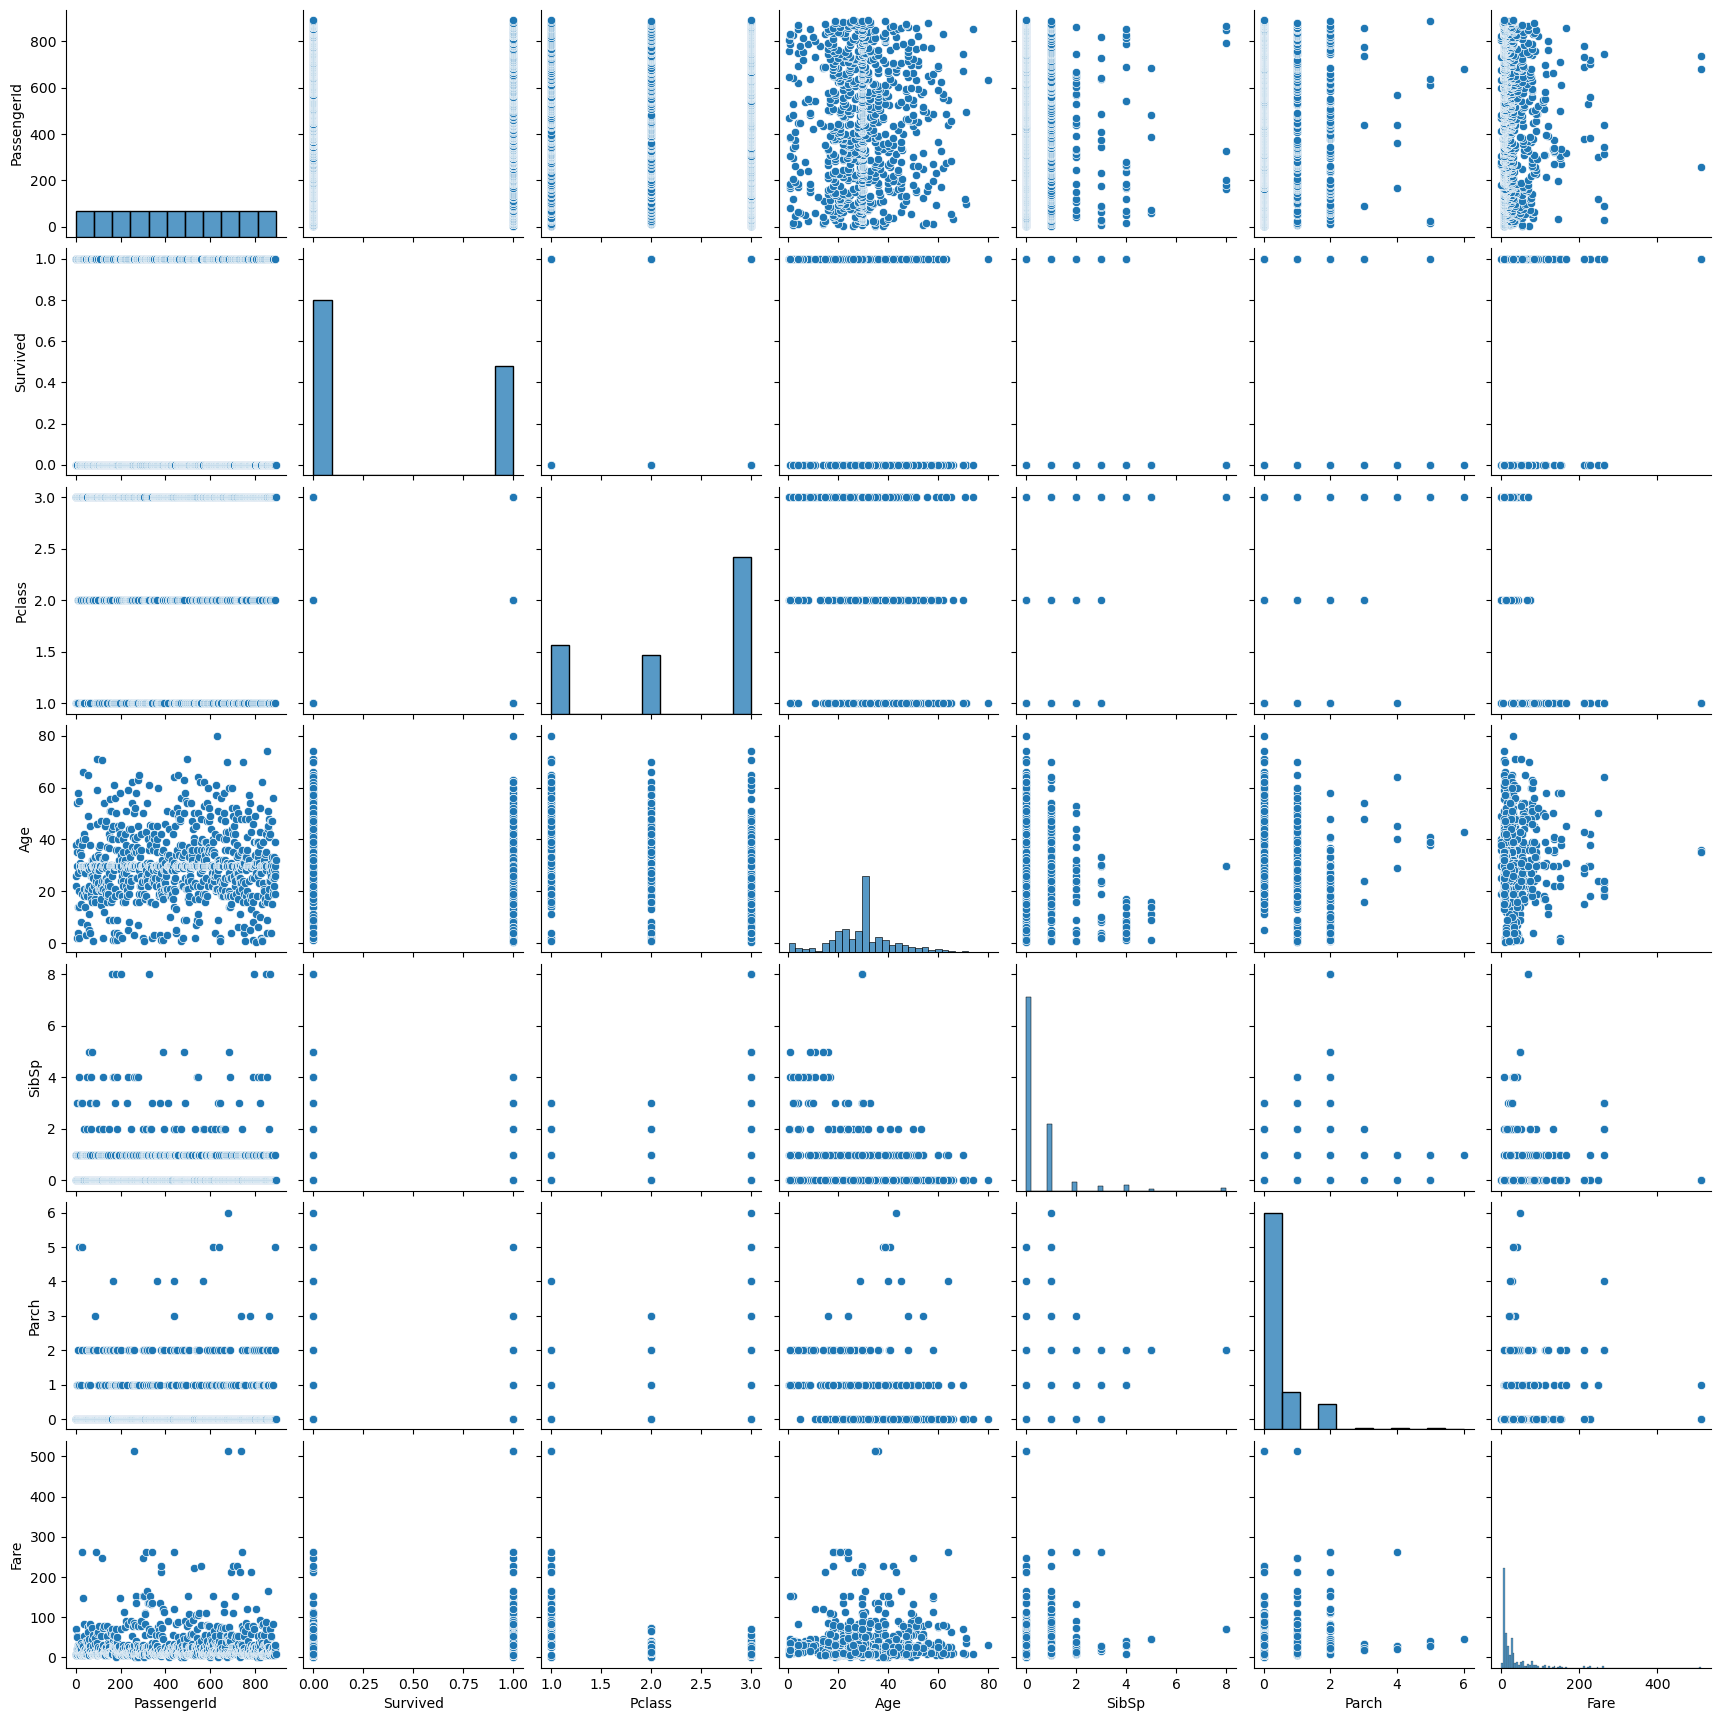

In [267]:
sns.pairplot(df)
plt.show()

In [268]:
df.select_dtypes(include= 'number').corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033207 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.069809 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.331339  0.083081  0.018443   
Age             0.033207 -0.069809 -0.331339  1.000000 -0.232625 -0.179191   
SibSp          -0.057527 -0.035322  0.083081 -0.232625  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.179191  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.091566  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.091566  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

<Axes: >

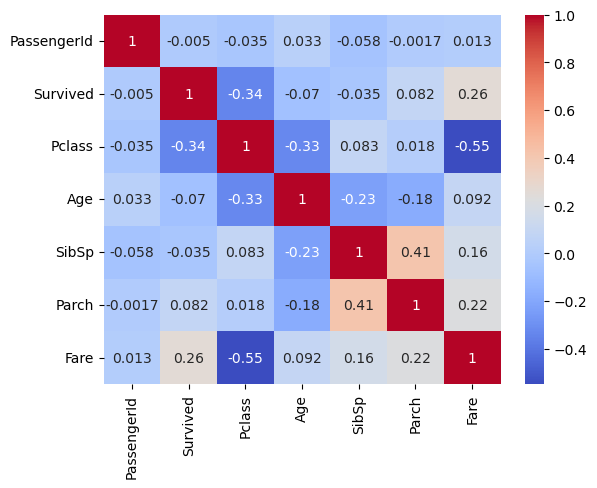

In [269]:
sns.heatmap(df.select_dtypes(include= 'number').corr(),annot = True,cmap= 'coolwarm')


# 2. Data Preprocessing:

### a. Handle missing values (e.g., imputation).

i have already change the null values with mean and mode but cabin has too many nul values so i think to drop it 

In [270]:
df.drop('Cabin',axis =1, inplace = True )

In [271]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [272]:
df.select_dtypes(include = 'object').columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [273]:
df.select_dtypes(include='number')

PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare
0              1         0       3  22.000000      1      0   7.2500
1              2         1       1  38.000000      1      0  71.2833
2              3         1       3  26.000000      0      0   7.9250
3              4         1       1  35.000000      1      0  53.1000
4              5         0       3  35.000000      0      0   8.0500
..           ...       ...     ...        ...    ...    ...      ...
886          887         0       2  27.000000      0      0  13.0000
887          888         1       1  19.000000      0      0  30.0000
888          889         0       3  29.699118      1      2  23.4500
889          890         1       1  26.000000      0      0  30.0000
890          891         0       3  32.000000      0      0   7.7500

[891 rows x 7 columns]

## So we have  7 numeric cols and  4 object cols so we have to make obj to numeric so that machine can understand 

In [274]:
df = pd.get_dummies(df, columns = ['Embarked'], drop_first= True)

In [275]:
from sklearn.preprocessing import LabelEncoder

In [276]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [277]:
df['Ticket'].nunique()

681

In [278]:
df.drop(columns = ['Ticket'], inplace = True)


In [279]:
df.drop(columns = ['Name'], inplace= True)

In [280]:
#df['Ticket_prefix'] = df['Ticket'].apply(lambda x: x.split()[0] if not x.isdigit() else 'NoPrefix')

# extracting meaniful info from the column after that we will encode 

In [281]:
#ticket_dummies = pd.get_dummies(df['Ticket_prefix'], prefix='Ticket')
#df = pd.concat([df, ticket_dummies], axis=1)


In [282]:
df.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    1  22.0      1      0   7.2500   
1            2         1       1    0  38.0      1      0  71.2833   
2            3         1       3    0  26.0      0      0   7.9250   
3            4         1       1    0  35.0      1      0  53.1000   
4            5         0       3    1  35.0      0      0   8.0500   

   Embarked_C  Embarked_Q  Embarked_S  
0       False       False        True  
1        True       False       False  
2       False       False        True  
3       False       False        True  
4       False       False        True

## 3. Model Building:



## a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).



In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


logi = LogisticRegression(max_iter= 1000)


In [284]:
X = df.drop('Survived', axis =1)
Y = df['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [285]:
from sklearn.preprocessing import StandardScaler

scalar=  StandardScaler()
X_train_scalar = scalar.fit_transform(X_train)
X_test_scalar = scalar.transform(X_test)


logi.fit(X_train_scalar,Y_train)


LogisticRegression(max_iter=1000)

In [286]:
df.dtypes[df.dtypes== 'object']

Series([], dtype: object)

## 4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.


In [287]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [288]:
y_predict = logi.predict(X_test_scalar)
y_prob = logi.predict_proba(X_test_scalar)[:, 1]

accuracy = accuracy_score(Y_test, y_predict)
accuracy

0.8044692737430168

In [289]:
precision_score = precision_score(Y_test, y_predict)
precision_score

0.7746478873239436

In [290]:
f1 = f1_score(Y_test, y_predict)
f1

0.7586206896551724

In [291]:
recall_score = recall_score(Y_test, y_predict)
recall_score

0.7432432432432432

In [292]:
confusion_matrix= confusion_matrix(Y_test,y_predict)
confusion_matrix

array([[89, 16],
       [19, 55]], dtype=int64)

In [293]:
roc_auc_score = roc_auc_score(Y_test,y_predict)
roc_auc_score

0.7954311454311453

In [298]:
#sns.heatmap(confusion_matrix(Y_test,y_predict), annot = True, fmt= 'g')

TypeError: 'numpy.ndarray' object is not callable

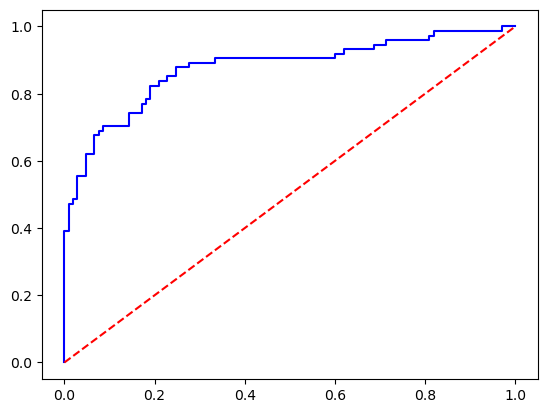

In [300]:
from sklearn.metrics import roc_curve

y_probs = logi.predict_proba(X_test_scalar)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Model')
plt.show()

In [301]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, y_probs)
print(f"ROC-AUC Score: {auc_score:.2f}")

ROC-AUC Score: 0.88


## Interpretation


### a. Interpret the coefficients of the logistic regression model.


In [306]:

# Create a DataFrame to view the coefficients with their feature names
model = LogisticRegression()
model.fit(X_train,Y_train)
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
})
print(coefficients)

       Feature  Coefficient
0  PassengerId     0.000914
1       Pclass    -0.275900
2          Sex    -2.624839
3          Age    -0.004779
4        SibSp    -0.187581
5        Parch    -0.367605
6         Fare     0.010931
7   Embarked_C     0.540429
8   Embarked_Q     0.152388
9   Embarked_S     0.255748


C:\Users\Asad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Sex is the most important negative factor (large negative value).
### Embarked_C has the strongest positive impact.
### PassengerId is likely not useful and can be dropped in future models.
### Smaller values (like Age, Fare) still matter, but not strongly.

### b. Discuss the significance of features in predicting the target variable (survival probability in this case).

-Sex is the most important feature — being female greatly increased survival chances.

-Pclass matters — passengers in higher classes had better chances of surviving.

-Embarked_C (Cherbourg) is associated with higher survival.

-Fare has a small positive impact — richer passengers did slightly better.

-SibSp and Parch (family onboard) slightly reduced chances.

-Age has a small negative effect — older people were less likely to survive.

-PassengerId is not useful and should be dropped.

## 6. Deployment with Streamlit:



### In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 


In [313]:
X_train

PassengerId  Pclass  Sex        Age  SibSp  Parch      Fare  Embarked_C  \
331          332       1    1  45.500000      0      0   28.5000       False   
733          734       2    1  23.000000      0      0   13.0000       False   
382          383       3    1  32.000000      0      0    7.9250       False   
704          705       3    1  26.000000      1      0    7.8542       False   
813          814       3    0   6.000000      4      2   31.2750       False   
..           ...     ...  ...        ...    ...    ...       ...         ...   
106          107       3    0  21.000000      0      0    7.6500       False   
270          271       1    1  29.699118      0      0   31.0000       False   
860          861       3    1  41.000000      2      0   14.1083       False   
435          436       1    0  14.000000      1      2  120.0000       False   
102          103       1    1  21.000000      0      1   77.2875       False   

     Embarked_Q  Embarked_S  
331       False        True  
733       False        True  
382       False        True  
704       False        True  
813       False        True  
..          ...         ...  
106       False        True  
270       False        True  
860       False        True  
435       False        True  
102       False        True  

[712 rows x 10 columns]

In [309]:
import pickle

# Save model
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(logi, f)

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scalar, f)
